### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
# Criando a coluna de valor total para cada loja
loja["valor_total"] = loja["Preço"] * loja["Quantidade de parcelas"]
loja2["valor_total"] = loja2["Preço"] * loja2["Quantidade de parcelas"]
loja3["valor_total"] = loja3["Preço"] * loja3["Quantidade de parcelas"]
loja4["valor_total"] = loja4["Preço"] * loja4["Quantidade de parcelas"]


In [3]:
faturamento_loja1 = loja["valor_total"].sum()
faturamento_loja2 = loja2["valor_total"].sum()
faturamento_loja3 = loja3["valor_total"].sum()
faturamento_loja4 = loja4["valor_total"].sum()


In [4]:
df_faturamento = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Faturamento": [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})
df_faturamento


,Loja,Faturamento
0,Loja 1,4563636.11
1,Loja 2,4449584.18
2,Loja 3,4325091.42
3,Loja 4,4131753.14


/tmp/ipython-input-35-1733363955.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_faturamento, x="Loja", y="Faturamento", palette="Blues_d")


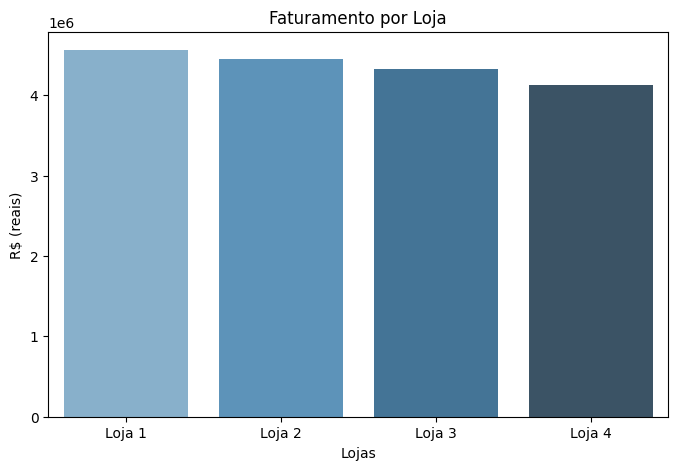

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=df_faturamento, x="Loja", y="Faturamento", palette="Blues_d")
plt.title("Faturamento por Loja")
plt.ylabel("R$ (reais)")
plt.xlabel("Lojas")
plt.savefig('grafico_faturamento.png', bbox_inches='tight')



# 2. Vendas por Categoria


In [6]:
# Agrupando por categoria e somando as vendas
categorias_loja1 = loja.groupby("Categoria do Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False)
categorias_loja2 = loja2.groupby("Categoria do Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False)
categorias_loja3 = loja3.groupby("Categoria do Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False)
categorias_loja4 = loja4.groupby("Categoria do Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False)


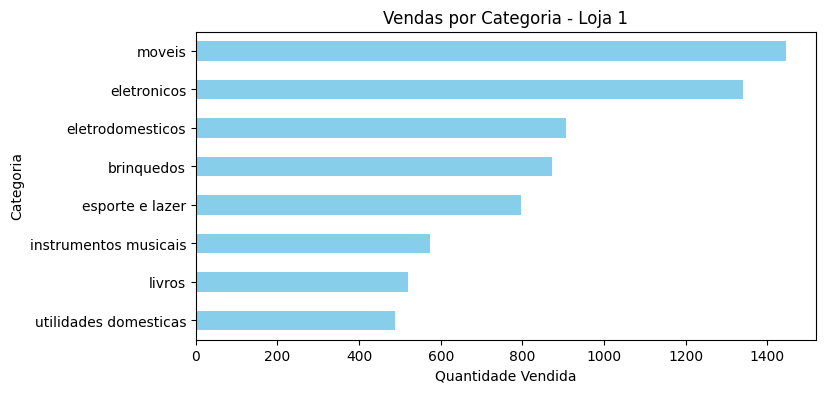

In [36]:
plt.figure(figsize=(8, 4))
categorias_loja1.plot(kind="barh", color="skyblue")
plt.title("Vendas por Categoria - Loja 1")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Categoria")
plt.gca().invert_yaxis()  # Coloca a categoria mais vendida no topo
plt.savefig('graf_vendas_categoria_loja1.png', bbox_inches='tight')



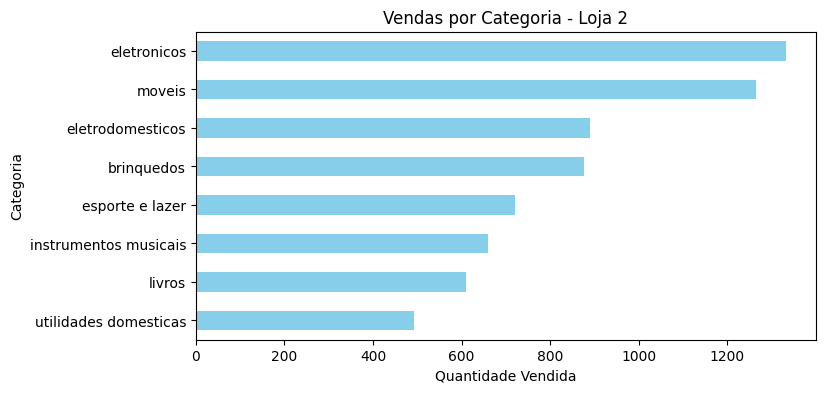

In [37]:
plt.figure(figsize=(8, 4))
categorias_loja2.plot(kind="barh", color="skyblue")
plt.title("Vendas por Categoria - Loja 2")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Categoria")
plt.gca().invert_yaxis()  # Coloca a categoria mais vendida no topo
plt.savefig('graf_vendas_categoria_loja2.png', bbox_inches='tight')


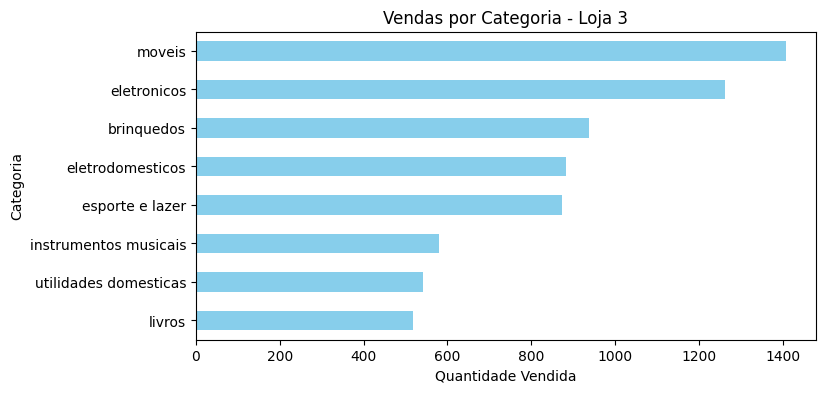

In [38]:
plt.figure(figsize=(8, 4))
categorias_loja3.plot(kind="barh", color="skyblue")
plt.title("Vendas por Categoria - Loja 3")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Categoria")
plt.gca().invert_yaxis()  # Coloca a categoria mais vendida no topo
plt.savefig('graf_vendas_categoria_loja3.png', bbox_inches='tight')


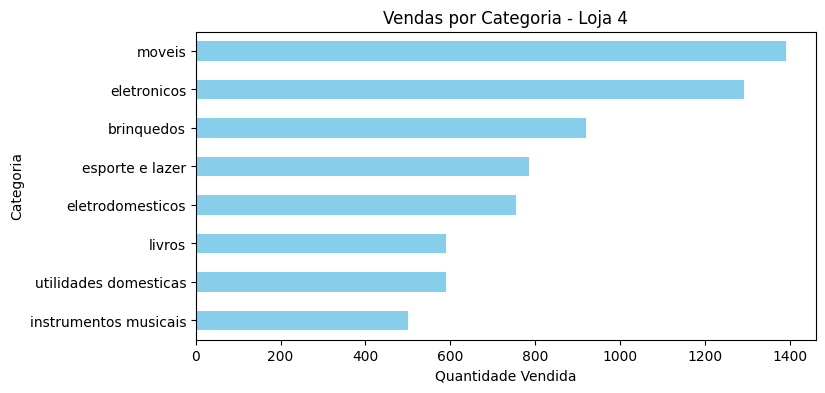

In [39]:
plt.figure(figsize=(8, 4))
categorias_loja4.plot(kind="barh", color="skyblue")
plt.title("Vendas por Categoria - Loja 4")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Categoria")
plt.gca().invert_yaxis()  # Coloca a categoria mais vendida no topo
plt.savefig('graf_vendas_categoria_loja4.png', bbox_inches='tight')

# 3. Média de Avaliação das Lojas

In [11]:
avaliacao_loja1 = loja["Avaliação da compra"].mean()
avaliacao_loja2 = loja2["Avaliação da compra"].mean()
avaliacao_loja3 = loja3["Avaliação da compra"].mean()
avaliacao_loja4 = loja4["Avaliação da compra"].mean()


In [12]:
df_avaliacao = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Média de Avaliação": [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]
})
df_avaliacao


,Loja,Média de Avaliação
0,Loja 1,3.976685
1,Loja 2,4.037304
2,Loja 3,4.048326
3,Loja 4,3.995759


/tmp/ipython-input-13-3523890794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avaliacao, x="Loja", y="Média de Avaliação", palette="viridis")


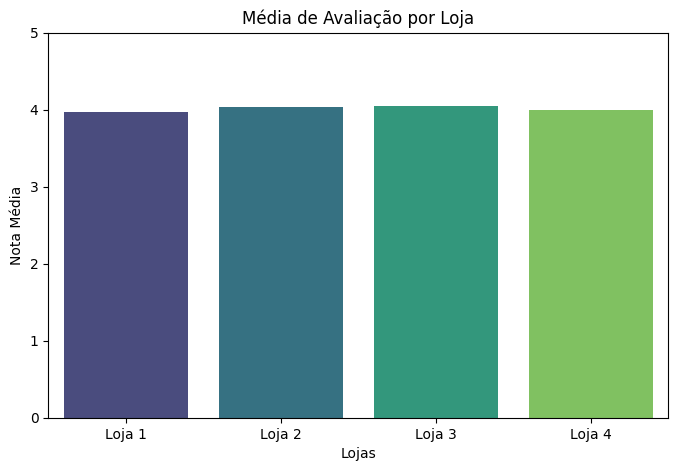

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_avaliacao, x="Loja", y="Média de Avaliação", palette="viridis")
plt.title("Média de Avaliação por Loja")
plt.ylim(0, 5)  # Avaliações vão de 1 a 5
plt.ylabel("Nota Média")
plt.xlabel("Lojas")
plt.show()


In [14]:
loja["Avaliação da compra"].value_counts().sort_index()


,count
Avaliação da compra,
1,319
2,86
3,218
4,444
5,1292


/tmp/ipython-input-15-1183720647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Avaliação da compra", data=loja, palette="coolwarm")


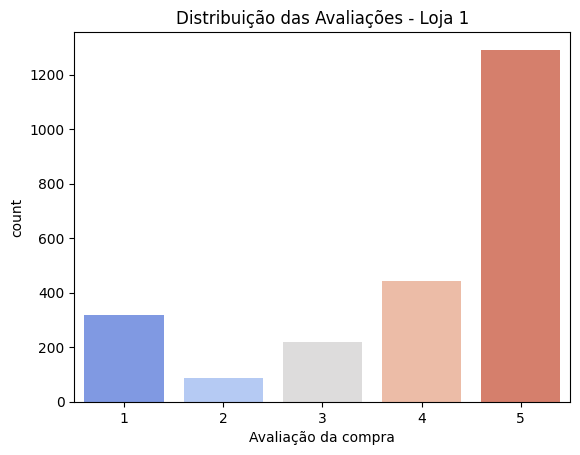

In [15]:
#Loja 1
sns.countplot(x="Avaliação da compra", data=loja, palette="coolwarm")
plt.title("Distribuição das Avaliações - Loja 1")
plt.show()


/tmp/ipython-input-16-94689286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Avaliação da compra", data=loja2, palette="coolwarm")


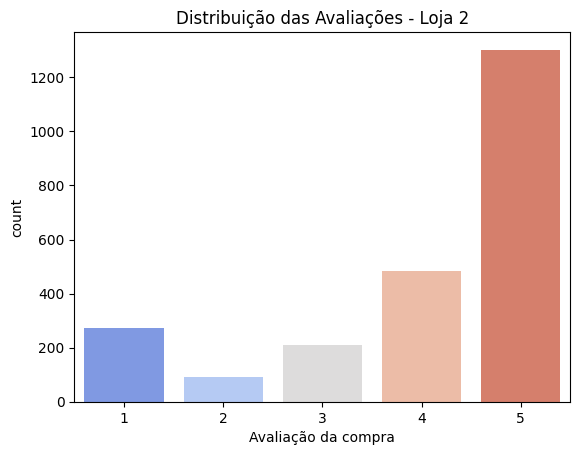

In [16]:
# Loja 2
sns.countplot(x="Avaliação da compra", data=loja2, palette="coolwarm")
plt.title("Distribuição das Avaliações - Loja 2")
plt.show()

/tmp/ipython-input-17-1648392978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Avaliação da compra", data=loja3, palette="coolwarm")


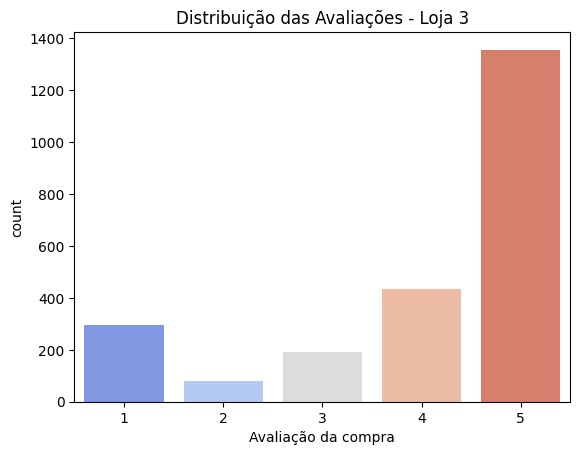

In [17]:
# Loja 3
sns.countplot(x="Avaliação da compra", data=loja3, palette="coolwarm")
plt.title("Distribuição das Avaliações - Loja 3")
plt.show()


/tmp/ipython-input-18-4015641227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Avaliação da compra", data=loja4, palette="coolwarm")


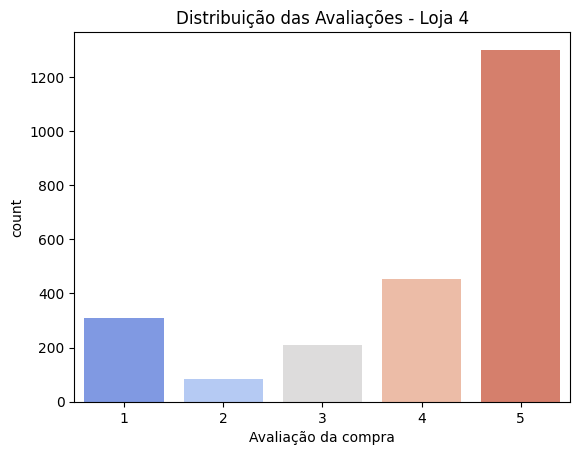

In [18]:
# Loja 4
sns.countplot(x="Avaliação da compra", data=loja4, palette="coolwarm")
plt.title("Distribuição das Avaliações - Loja 4")
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [19]:
mais_vendidos_loja1 = loja.groupby("Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False)
menos_vendidos_loja1 = mais_vendidos_loja1.tail(5)  # 5 menos vendidos
mais_vendidos_loja1 = mais_vendidos_loja1.head(5)   # 5 mais vendidos


In [20]:
mais_vendidos_loja2 = loja2.groupby("Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False)
menos_vendidos_loja2 = mais_vendidos_loja2.tail(5)  # 5 menos vendidos
mais_vendidos_loja2 = mais_vendidos_loja2.head(5)   # 5 mais vendidos

In [21]:
mais_vendidos_loja3 = loja3.groupby("Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False)
menos_vendidos_loja3 = mais_vendidos_loja3.tail(5)  # 5 menos vendidos
mais_vendidos_loja3 = mais_vendidos_loja3.head(5)   # 5 mais vendidos

In [22]:
mais_vendidos_loja4 = loja4.groupby("Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False)
menos_vendidos_loja4 = mais_vendidos_loja4.tail(5)  # 5 menos vendidos
mais_vendidos_loja4 = mais_vendidos_loja4.head(5)   # 5 mais vendidos

##4.1 Produtos Mais Vendidos

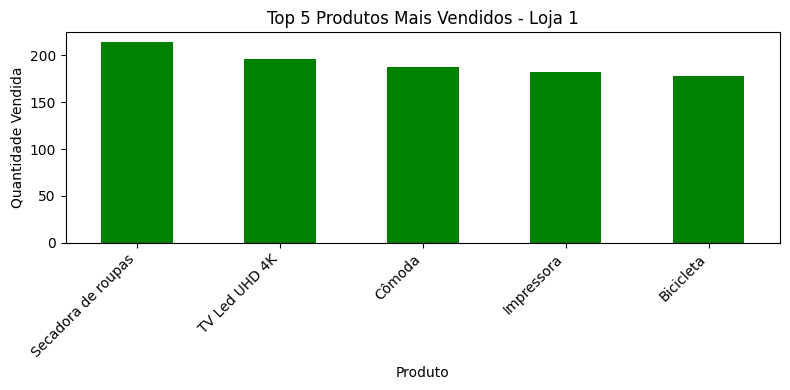

In [23]:
plt.figure(figsize=(8,4))
mais_vendidos_loja1.plot(kind="bar", color="green")
plt.title("Top 5 Produtos Mais Vendidos - Loja 1")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


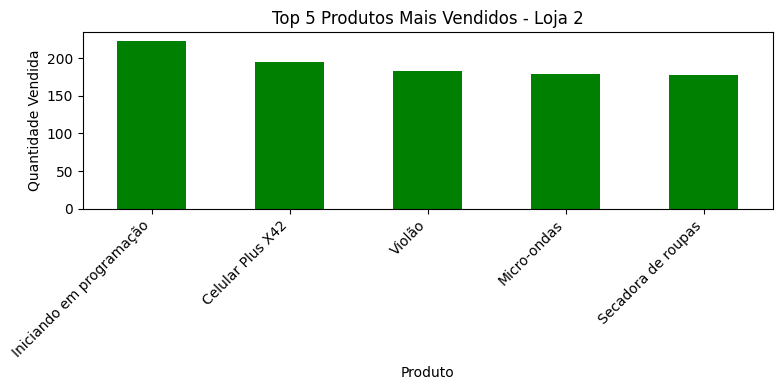

In [24]:
plt.figure(figsize=(8,4))
mais_vendidos_loja2.plot(kind="bar", color="green")
plt.title("Top 5 Produtos Mais Vendidos - Loja 2")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


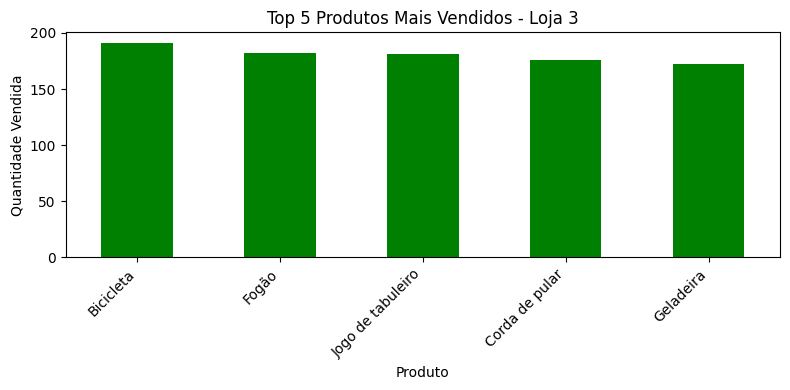

In [25]:
plt.figure(figsize=(8,4))
mais_vendidos_loja3.plot(kind="bar", color="green")
plt.title("Top 5 Produtos Mais Vendidos - Loja 3")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


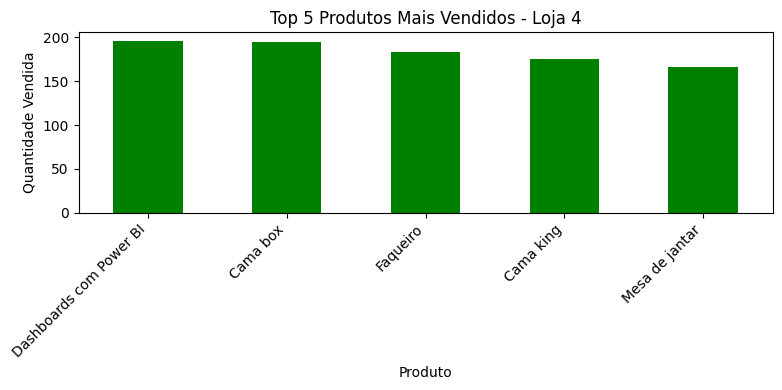

In [26]:
plt.figure(figsize=(8,4))
mais_vendidos_loja4.plot(kind="bar", color="green")
plt.title("Top 5 Produtos Mais Vendidos - Loja 4")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##4.2 Produtos Menos Vendidos


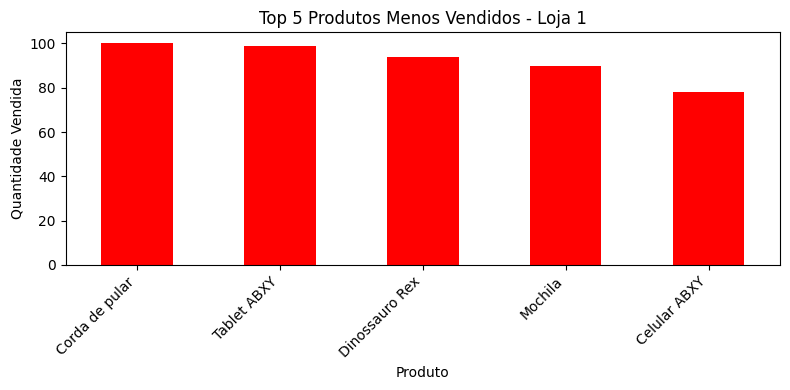

In [27]:
plt.figure(figsize=(8,4))
menos_vendidos_loja1.plot(kind="bar", color="red")
plt.title("Top 5 Produtos Menos Vendidos - Loja 1")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


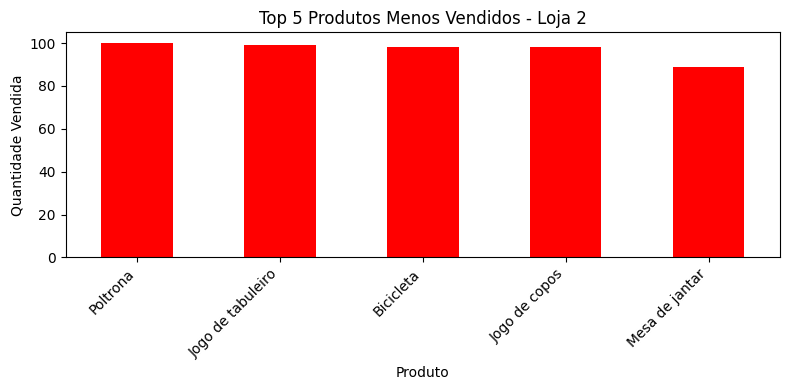

In [28]:
plt.figure(figsize=(8,4))
menos_vendidos_loja2.plot(kind="bar", color="red")
plt.title("Top 5 Produtos Menos Vendidos - Loja 2")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


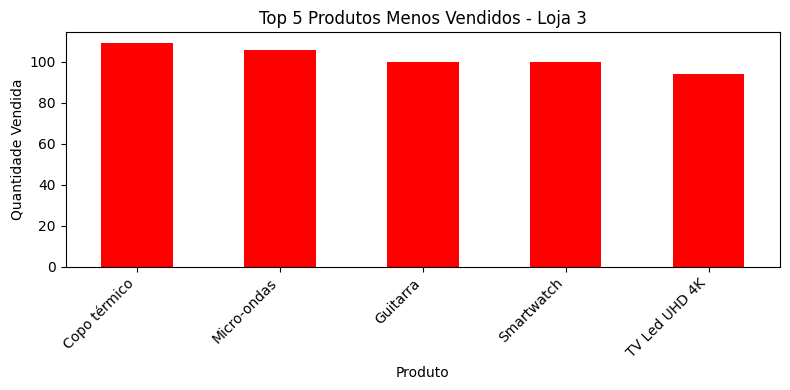

In [29]:
plt.figure(figsize=(8,4))
menos_vendidos_loja3.plot(kind="bar", color="red")
plt.title("Top 5 Produtos Menos Vendidos - Loja 3")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


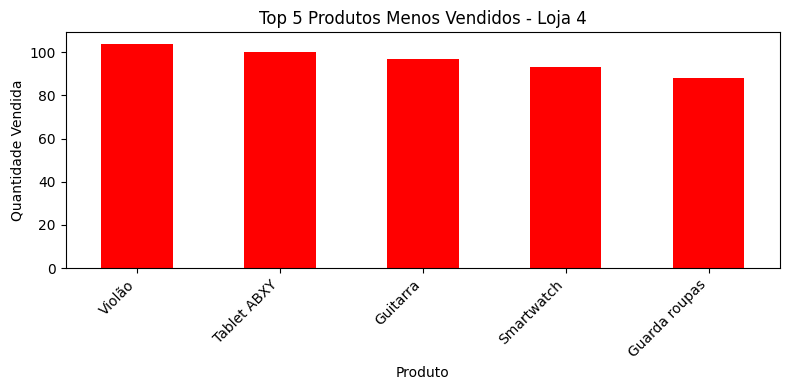

In [30]:
plt.figure(figsize=(8,4))
menos_vendidos_loja4.plot(kind="bar", color="red")
plt.title("Top 5 Produtos Menos Vendidos - Loja 4")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [31]:
frete_medio_loja1 = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()


In [32]:
df_frete = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Frete Médio": [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
})
df_frete


,Loja,Frete Médio
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


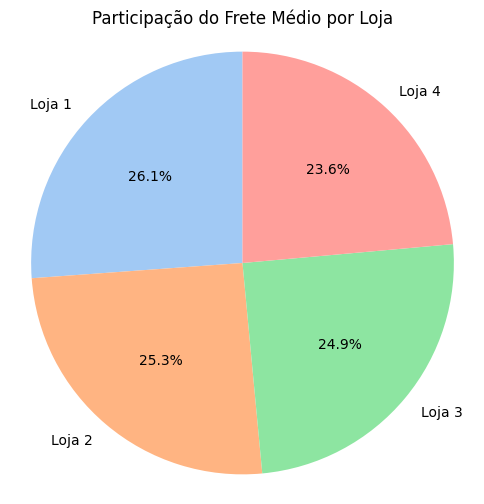

In [40]:
plt.figure(figsize=(6,6))
plt.pie(df_frete["Frete Médio"], labels=df_frete["Loja"], autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Participação do Frete Médio por Loja")
plt.axis("equal")  # garante o formato circular
plt.savefig('graf_frete_medio_por_loja.png', bbox_inches='tight')


## ✅ Relatório

Após uma análise exploratória dos dados de vendas, avaliações e logística das quatro lojas da rede Alura Store, foi possível identificar pontos fortes e fracos de cada unidade. A seguir, apresentamos os principais insights extraídos:

### 📊 Faturamento:
- A **Loja 4** apresentou o menor faturamento entre todas, indicando baixa performance em vendas.
- As demais lojas demonstraram desempenho superior em volume financeiro gerado.

### 📶 Categorias Vendidas:
- Cada loja tem foco em diferentes categorias, mas a **Loja 4** mostrou menor diversidade ou volume de vendas em categorias populares, o que pode indicar pouca atratividade para os clientes.

### 🌟 Avaliação dos Clientes:
- A **Loja 1** teve a **menor média de avaliação**, o que sugere uma experiência de compra insatisfatória.
- Já a **Loja 3** foi a melhor avaliada, destacando-se em satisfação do cliente.

### 📦 Produtos Vendidos:
- A **Loja 2** concentra-se em produtos de menor giro, com alto número de itens com vendas um pouco baixas em comparação com as demais lojas, mas ainda em segundo lugar se tratando do faturamento.
- Os produtos mais vendidos estão mais bem distribuídos nas outras lojas.

### 🚚 Frete Médio:
- A **Loja 1** também apresentou o **maior custo médio de frete**, o que poderia ser um fator decisivo na desistência dos clientes, porém, como mencionado no primeiro item desse relatório, ela tem o maior faturamento.

---

## 🧠 Recomendação Final

Com base nos dados analisados, recomendamos que o Senhor João considere **vender a Loja 4**, pois ela apresenta:

- O menor faturamento  
- Uma avaliação razoável, porém, longe de ser a melhor  
- Produtos com baixo volume de vendas e diversidade  

Essa loja demonstra baixa eficiência comercial e operacional, o que a torna a **menos estratégica para manter na rede Alura Store**.
